In [1]:
'''
attribute 선택
전처리

variabel selection / 가공 / PCA

algorithm 성능 지표 
전처리  ABC

알고리즘 abcd

모델
'''
import pandas as pd

table = pd.read_csv("wdbc.csv",header = None)

이 brest cancer wisconsin data를 통해서 의사결정을 도와줄 수 있는 효과적인 classification model을 만드는 것이 목적이다

그렇기 떄문에 다양한 데이터 전처리: data transformation, feature selection 을 이용하고 다양한 decision model algorithm을 이용해 여러가지 모델들의 accuracy를 비교하고 그중 가장 성능이 좋은 모델을 채택할 것이다

우선 사용하는 데이터에 대해 간단한 설명을 하자면 




In [2]:
import pandas as pd

table = pd.read_csv("wdbc.csv",header = None)

In [3]:
table.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
name =["ID", "diagnosis","radius","texture","perimeter","area","smoothness","compactness","concavity","concave points","symmetry","fractal dimention",
"radius_SD","texture_SD","perimeter_SD","area_SD","smoothness_SD","compactness_SD","concavity_SD","concave points_SD","symmetry_SD","fractal dimention_SD",
"radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal dimention_worst"
 ]
table.columns = name

### data pre-processing

1. check missing value

2. select attribute: id 제거

3. box plot 을 통한 data scale(SD, mean) 평가



In [5]:
# null 값 찾기

pd.isnull(table).any()

ID                         False
diagnosis                  False
radius                     False
texture                    False
perimeter                  False
area                       False
smoothness                 False
compactness                False
concavity                  False
concave points             False
symmetry                   False
fractal dimention          False
radius_SD                  False
texture_SD                 False
perimeter_SD               False
area_SD                    False
smoothness_SD              False
compactness_SD             False
concavity_SD               False
concave points_SD          False
symmetry_SD                False
fractal dimention_SD       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [6]:
t_a = table.iloc[:,1:]

In [7]:
t_a.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimention_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
t_a.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimention,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimention_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


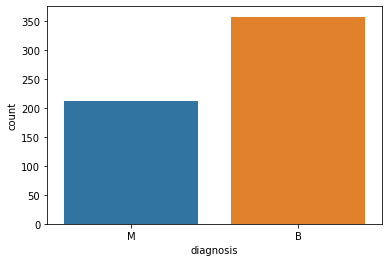

In [9]:
import seaborn as sns

sns.countplot(table["diagnosis"])

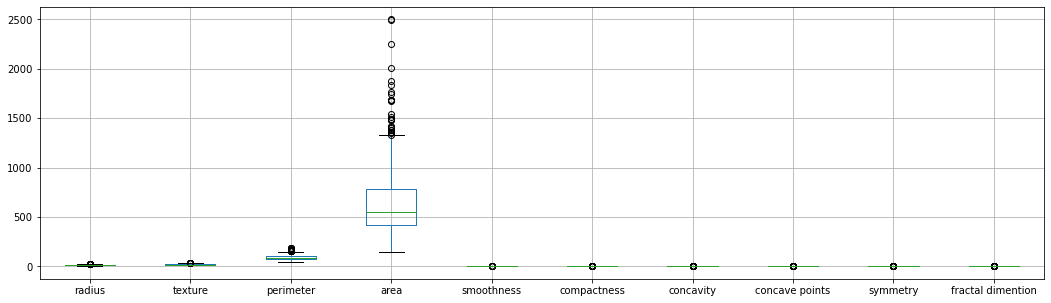

In [10]:
t_a.boxplot(column=name[2:12],figsize=(18,5))

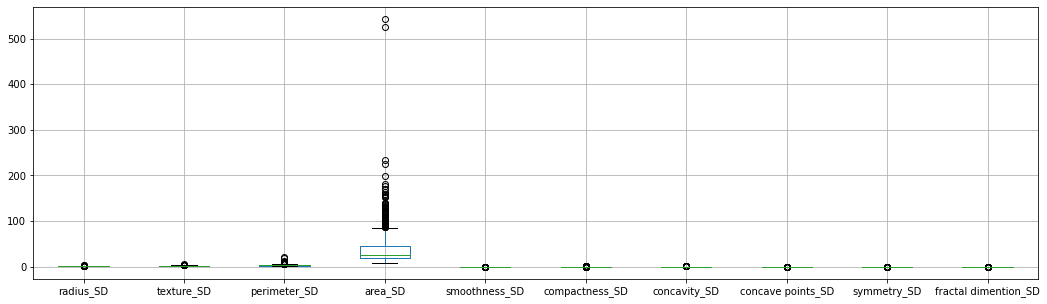

In [11]:
t_a.boxplot(column=name[12:22],figsize=(18,5))

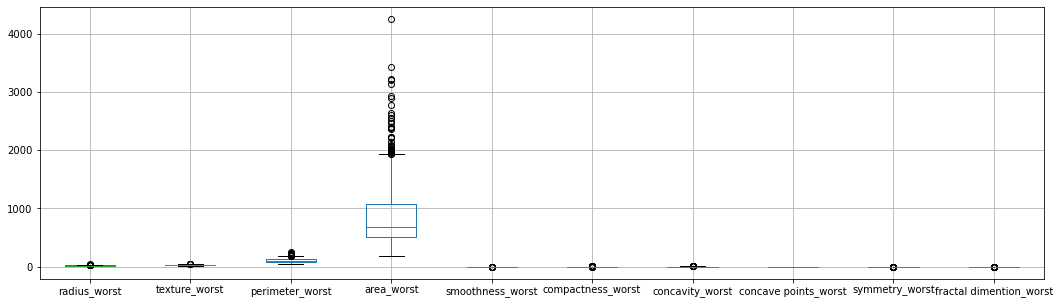

In [12]:
t_a.boxplot(column=name[22:32],figsize=(18,5))

In [13]:
# we can see that area, area_SD, area_worst have dominated scale

# in order to see other attribute's scale, i will get rid of area, area_SD, area_worst and make a box_plot

In [14]:
t_not_area = t_a.drop([ 'area', 'area_SD', 'area_worst' ],axis=1)

In [15]:
t_not_area.head()

,diagnosis,radius,texture,perimeter,smoothness,compactness,concavity,concave points,symmetry,fractal dimention,...,fractal dimention_SD,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimention_worst
0,M,17.99,10.38,122.80,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.006193,25.38,17.33,184.60,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.003532,24.99,23.41,158.80,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.004571,23.57,25.53,152.50,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.009208,14.91,26.50,98.87,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.005115,22.54,16.67,152.20,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


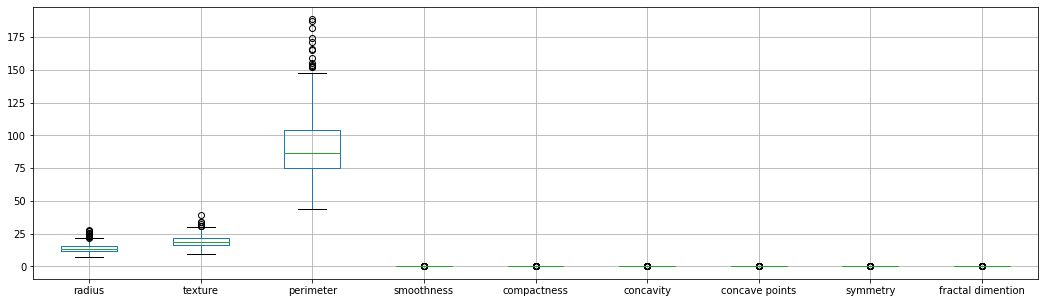

In [16]:
t_not_area.iloc[:,1:10].boxplot(figsize=(18,5))

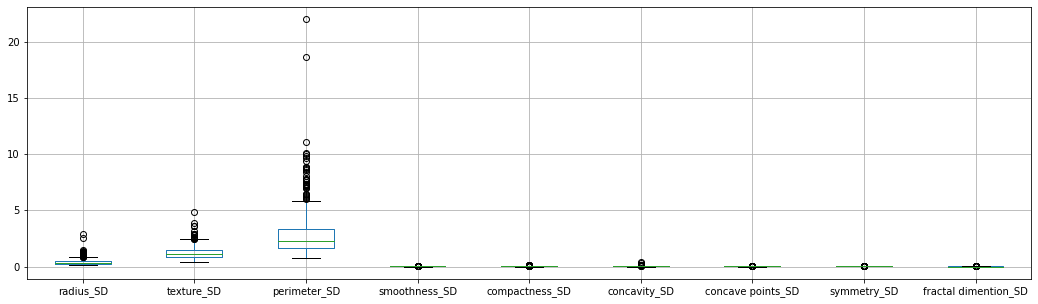

In [17]:
t_not_area.iloc[:,10:19].boxplot(figsize=(18,5))

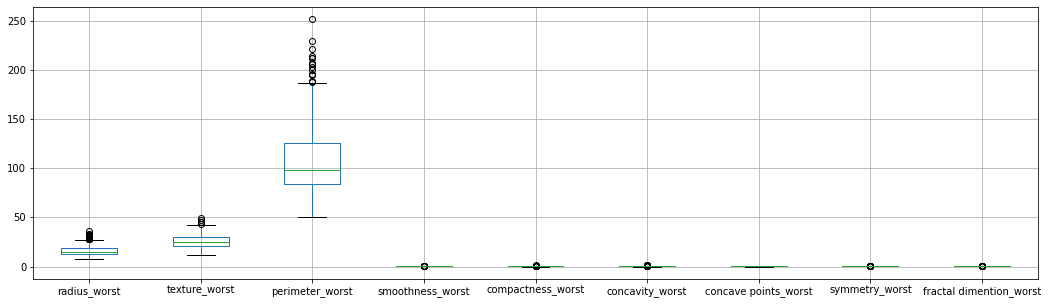

In [18]:
t_not_area.iloc[:,19:28].boxplot(figsize=(18,5))

In [19]:
t_a.describe().T.sort_values(by="std",ascending=False)

,count,mean,std,min,25%,50%,75%,max
area_worst,569.0,880.583128,569.356993,185.200000,515.300000,686.500000,1084.000000,4254.00000
area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
area_SD,569.0,40.337079,45.491006,6.802000,17.850000,24.530000,45.190000,542.20000
perimeter_worst,569.0,107.261213,33.602542,50.410000,84.110000,97.660000,125.400000,251.20000
perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
texture_worst,569.0,25.677223,6.146258,12.020000,21.080000,25.410000,29.720000,49.54000
radius_worst,569.0,16.269190,4.833242,7.930000,13.010000,14.970000,18.790000,36.04000
texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
perimeter_SD,569.0,2.866059,2.021855,0.757000,1.606000,2.287000,3.357000,21.98000


In [20]:
t_a.describe().T.sort_values(by="mean",ascending=False)

,count,mean,std,min,25%,50%,75%,max
area_worst,569.0,880.583128,569.356993,185.200000,515.300000,686.500000,1084.000000,4254.00000
area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
perimeter_worst,569.0,107.261213,33.602542,50.410000,84.110000,97.660000,125.400000,251.20000
perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_SD,569.0,40.337079,45.491006,6.802000,17.850000,24.530000,45.190000,542.20000
texture_worst,569.0,25.677223,6.146258,12.020000,21.080000,25.410000,29.720000,49.54000
texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
radius_worst,569.0,16.269190,4.833242,7.930000,13.010000,14.970000,18.790000,36.04000
radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
perimeter_SD,569.0,2.866059,2.021855,0.757000,1.606000,2.287000,3.357000,21.98000


### data transformation

##### data transformation to 
1. mean = 0, sd = 1
2. min_max scale [0,1]
3. max_abs scale [-1,1]
4. normalization


In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

# data set attribute / class로 나누기
x_ori = t_a.iloc[:,1:]
y_ori = t_a.iloc[:,0]


# data test set, train set으로 분리
x_train,x_test,y_train,y_test = train_test_split(x_ori,y_ori,test_size = 0.3,random_state =0 )


# scale function mean=0, sd = 1
scaler = preprocessing.StandardScaler().fit(x_ori)
scale_x_test = scaler.transform(x_test)
scale_x_train = scaler.transform(x_train)


# min_max_scaler  [0,1]
min_max_scaler = preprocessing.MinMaxScaler().fit(x_ori)
min_max_x_test = min_max_scaler.transform(x_test)
min_max_x_train= min_max_scaler.transform(x_train)

# max_abs_scaler
max_abs_scaler=preprocessing.MaxAbsScaler().fit(x_ori)
max_abs_x_test = max_abs_scaler.transform(x_test)
max_abs_x_train= max_abs_scaler.transform(x_train)


# normalization
normalization=preprocessing.Normalizer().fit(x_ori)
normalization_x_test = normalization.transform(x_test)
normalization_x_train= normalization.transform(x_train)

### for feature selection

1. draw a correaltion matrix in order to find dependency among attributes

In [22]:
table1 = table.loc[:,"radius":"fractal dimention"]
corr1 = table1.corr()
#corr1.style.background_gradient(cmap='coolwarm').set_precision(2)

In [23]:
table2 = table.loc[:,"radius_SD":"fractal dimention_SD"]
corr2 = table2.corr()
#corr2.style.background_gradient(cmap='coolwarm').set_precision(2)

In [24]:
table3 = table.loc[:,"radius_worst":"fractal dimention_worst"]
corr3 = table3.corr()
#corr3.style.background_gradient(cmap='coolwarm').set_precision(2)

In [25]:
corr4 = t_a.corr()
#corr4.style.background_gradient(cmap='coolwarm').set_precision(2)

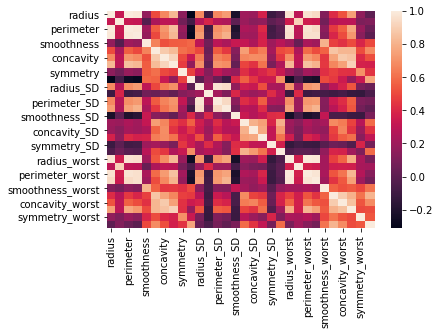

In [26]:
sns.heatmap(corr4)

In [27]:
# select feature which correalation is lower than 0.90
m = ~(corr4.mask(np.eye(len(corr4), dtype=bool)).abs() > 0.9).any()
raw90 = corr4.loc[m, m]

m = ~(corr4.mask(np.eye(len(corr4), dtype=bool)).abs() > 0.8).any()
raw80 = corr4.loc[m, m]

In [28]:
raw90.columns

Index(['smoothness', 'compactness', 'symmetry', 'fractal dimention',
       'texture_SD', 'smoothness_SD', 'compactness_SD', 'concavity_SD',
       'concave points_SD', 'symmetry_SD', 'fractal dimention_SD',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal dimention_worst'],
      dtype='object')

In [29]:
raw80.columns

Index(['symmetry', 'fractal dimention', 'texture_SD', 'smoothness_SD',
       'concave points_SD', 'symmetry_SD', 'symmetry_worst'],
      dtype='object')

In [30]:
# PCA


from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(scale_x_test)
pca_scale = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

printcipalComponents = pca.fit_transform(min_max_x_test)
pca_min_max = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

printcipalComponents = pca.fit_transform(max_abs_x_test)
pca_max_abs = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

printcipalComponents = pca.fit_transform(normalization_x_test)
pca_norm = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

In [31]:
pca_scale.head()

,principal component1,principal component2
0,2.441255,1.227253
1,-2.940748,-1.627627
2,-3.489801,-1.803371
3,-3.053364,-2.263828
4,-3.791502,-1.048600


In [32]:
pca_min_max.head()

,principal component1,principal component2
0,0.435681,0.269767
1,-0.407281,-0.259984
2,-0.467217,-0.284901
3,-0.396296,-0.334290
4,-0.563510,-0.213858


In [33]:
pca_max_abs.head()

,principal component1,principal component2
0,0.401075,0.126247
1,-0.400790,-0.181572
2,-0.415198,-0.215823
3,-0.362804,-0.232834
4,-0.507523,-0.144340


In [34]:
pca_norm.head()

,principal component1,principal component2
0,0.074767,0.027597
1,-0.039216,-0.013526
2,-0.048595,-0.035236
3,0.011312,-0.014026
4,-0.093518,-0.038349


In [35]:
# model 생성하기

from sklearn import datasets
from sklearn.model_selection import train_test_split

# data set attribute / class로 나누기
x_ori = table.iloc[:,2:]
y_ori = table.iloc[:,1:2]


# data test set, train set으로 분리
x_train,x_test,y_train,y_test = train_test_split(x_ori,y_ori,test_size = 0.3,random_state =0 )


In [36]:
# decision tree

from sklearn import tree

# 트리 생성_entropy
diagnosis_tree_entropy1 = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0)
diagnosis_tree_entropy1.fit(x_train,y_train)

# 트리 생성_gini
diagnosis_tree_gini1 = tree.DecisionTreeClassifier(criterion="gini",random_state = 0)
diagnosis_tree_gini1.fit(x_train,y_train)


# accuracy 구하기
from sklearn.metrics import accuracy_score

# entropy
dia_predict = diagnosis_tree_entropy1.predict(x_test)
print('Accuracy of "table" by criterion = entropy: %.2f' % accuracy_score(y_test, dia_predict))

# gini
dia_predict = diagnosis_tree_gini1.predict(x_test)
print('Accuracy of "table" by criterion = gini: %.2f' % accuracy_score(y_test, dia_predict))


Accuracy of "table" by criterion = entropy: 0.94
Accuracy of "table" by criterion = gini: 0.91


In [39]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# entropy decision tree 시각화
dot_data = export_graphviz(diagnosis_tree_entropy1, out_file = None, feature_names = name[2:], class_names = ["benign","malignant"],filled = True,rounded=True,special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
# gini decision tree 시각화
dot_data = export_graphviz(diagnosis_tree_gini1, out_file = None, feature_names = name[2:], class_names = ["benign","malignant"],filled = True,rounded=True,special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# 위 decision tree 는 attribute가 너무 많아 복잡하다
# ensemble기법중 attribute을 추출해서 만드는 random forest로 만들어 보겠다

from sklearn.ensemble import RandomForestClassifier


rf_gini = RandomForestClassifier(random_state = 0).fit(x_train,y_train.values.ravel())
rf_entropy = RandomForestClassifier(criterion="entropy" ,random_state = 0).fit(x_train,y_train.values.ravel())


In [ ]:
rf_gini.score(x_test,y_test.values.ravel())

In [ ]:
#feature_importances_
#The impurity-based feature importances.
rf_gini.feature_importances_

In [ ]:
importance_feature = pd.DataFrame(rf_gini.feature_importances_,columns = ["rf_gini"])
importance_feature["rf_entropy"] = rf_entropy.feature_importances_

In [ ]:
importance_feature.index = name[2:]

In [ ]:
importance_feature.nlargest(5,"rf_gini")

In [ ]:
importance_feature.nlargest(5,"rf_entropy")

In [ ]:
rf_gini_image = []
for i in range(10):
    d = export_graphviz(rf_gini[i], out_file = None, feature_names = name[2:], class_names = ["benign","malignant"],filled = True,rounded=True,special_characters = True)
    graph = pydotplus.graph_from_dot_data(d)
    rf_gini_image.append(graph)

Image(rf_gini_image[0].create_png())

In [ ]:
Image(rf_gini_image[0].create_png())

In [ ]:
# entropy

rf_entropy = RandomForestClassifier(criterion='entropy',random_state = 0)
rf_entropy.fit(x_train,y_train.values.ravel())
rf_entropy.score(x_test,y_test.values.ravel())


In [ ]:
rf_entropy_image = []
for i in range(10):
    d = export_graphviz(rf_entropy[i], out_file = None, feature_names = name[2:], class_names = ["benign","malignant"],filled = True,rounded=True,special_characters = True)
    graph = pydotplus.graph_from_dot_data(d)
    rf_entropy_image.append(graph)

Image(rf_entropy_image[0].create_png())

In [ ]:
Image(rf_entropy_image[1].create_png())

In [ ]:
Image(rf_entropy_image[2].create_png())

In [ ]:
Image(rf_entropy_image[3].create_png())

In [ ]:
Image(rf_entropy_image[4].create_png())

In [ ]:
Image(rf_entropy_image[5].create_png())

In [ ]:
Image(rf_entropy_image[6].create_png())

In [ ]:
Image(rf_entropy_image[7].create_png())

In [ ]:
Image(rf_entropy_image[8].create_png())

In [ ]:
Image(rf_entropy_image[9].create_png())

In [ ]:
# k-nearest neighbors classifier는 선행연구가 있어서 선행연구를 참고하여 모델을 생성했다
# 참고주소 :https://www.researchgate.net/profile/Seyyid_Ahmed_Medjahed/publication/258789703_Breast_Cancer_Diagnosis_by_using_k-Nearest_Neighbor_with_Different_Distances_and_Classification_Rules/links/5661605708ae15e7462c4969.pdf

# k = 1
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors = 1,weights='distance')
knn1.fit(x_train,y_train)

In [ ]:
# k = 2
knn2 = KNeighborsClassifier(n_neighbors = 2,weights='distance')
knn2.fit(x_train,y_train)

In [ ]:
# k = 3
knn3 = KNeighborsClassifier(n_neighbors = 3,weights='distance')
knn3.fit(x_train,y_train)

In [ ]:
# k = 4
knn4 = KNeighborsClassifier(n_neighbors = 4,weights='distance')
knn4.fit(x_train,y_train)

In [ ]:
# k = 5
knn5 = KNeighborsClassifier(n_neighbors = 5,weights='distance')
knn5.fit(x_train,y_train)

In [ ]:
# accuracy 평가
print("accuracy of 1-nearest neighbors : ",knn1.score(x_test,y_test))
print("accuracy of 2-nearest neighbors : ",knn2.score(x_test,y_test))
print("accuracy of 3-nearest neighbors : ",knn3.score(x_test,y_test))
print("accuracy of 4-nearest neighbors : ",knn4.score(x_test,y_test))
print("accuracy of 5-nearest neighbors : ",knn5.score(x_test,y_test))

In [ ]:
# 사전 연구에 의하면 k=1의 정확도가 가장 높아야 하는데 왜 낮은지 의아했음
# k-NN은 scaling issue가 있던 것을 생각해냄
# standardization 수행하고 다시 모델 만들것

# data set attribute / class로 나누기
x_ori = table.iloc[:,2:]
y_ori = table.iloc[:,1:2]


from sklearn import preprocessing
import numpy as np


# scale function mean=0, sd = 1

scaler = preprocessing.StandardScaler().fit(x_ori)

scale_x_test = scaler.transform(x_test)
scale_x_train = scaler.transform(x_train)


# min_max_scaler  [0,1]
min_max_scaler = preprocessing.MinMaxScaler().fit(x_ori)

min_max_x_test = min_max_scaler.transform(x_test)
min_max_x_train= min_max_scaler.transform(x_train)

# max_abs_scaler
max_abs_scaler=preprocessing.MaxAbsScaler().fit(x_ori)

max_abs_x_test = max_abs_scaler.transform(x_test)
max_abs_x_train= max_abs_scaler.transform(x_train)


# normalization
normalization=preprocessing.Normalizer().fit(x_ori)

normalization_x_test = normalization.transform(x_test)
normalization_x_train= normalization.transform(x_train)


In [ ]:
# standard
std = []
std_a = []

for i in range(10):
    
    d = KNeighborsClassifier(n_neighbors = i+1,weights='distance')
    d.fit(scale_x_train,y_train.values.ravel())
    std.append(d)
    ac = d.score(scale_x_test,y_test)
    std_a.append(ac)
    #print("preprocessed:standard; accuracy of ",i+1,"-nearest neighbors :", ac)
    
# min_max_scaler
min_max = []
min_max_a = []
for i in range(10):
    d = KNeighborsClassifier(n_neighbors = i+1,weights='distance')
    d.fit(min_max_x_train,y_train.values.ravel())
    min_max.append(d)
    ac = d.score(min_max_x_test,y_test)
    min_max_a.append(ac)
    #print("preprocessed:standard; accuracy of ",i+1,"-nearest neighbors :", ac)
    
# max_abs_scaler
max_abs = []
max_abs_a = []
for i in range(10):
    d = KNeighborsClassifier(n_neighbors = i+1,weights='distance')
    d.fit(max_abs_x_train,y_train.values.ravel())
    max_abs.append(d)
    ac = d.score(max_abs_x_test,y_test)
    max_abs_a.append(ac)
    #print("preprocessed:standard; accuracy of ",i+1,"-nearest neighbors :", ac)
    
# normalization
normalization = []
normal_a = []
for i in range(10):
    d = KNeighborsClassifier(n_neighbors = i+1,weights='distance')
    d.fit(normalization_x_train,y_train.values.ravel())
    normalization.append(d)
    ac = d.score(normalization_x_test,y_test)
    normal_a.append(ac)
    #print("preprocessed:standard; accuracy of ",i+1,"-nearest neighbors :", ac)
    
acc_dic = {"std":std_a,"min_max":min_max_a,"max_abs":max_abs_a,"normalization":normal_a }
accuracy_table = pd.DataFrame(acc_dic,index = range(1,11))

In [ ]:
accuracy_table

In [ ]:
accuracy_table.max()

In [ ]:
accuracy_table.idxmax()

In [ ]:
# k=5 이고 min_max --> accuracy : 0.970760 로 최고


In [ ]:
# Naive Bayes classifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train.values.ravel()).predict(x_test)

print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test.values.ravel() != y_pred).sum()))

In [ ]:
print("accuracy: %.6f" %(13/171))

In [ ]:
# perceptron

from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state=0).fit(x_train, y_train.values.ravel())

perceptron.score(x_test, y_test.values.ravel())


In [ ]:
from sklearn.neural_network import MLPClassifier

activation=('identity', 'logistic', 'tanh', 'relu')
solver = ['lbfgs', 'sgd','adam']

# solver

mlp_acccuracy = pd.DataFrame()

for i in solver:
    mlp_relu = MLPClassifier(solver = i, random_state=1, max_iter=10000).fit(x_train, y_train)
    mlp_tanh = MLPClassifier(solver = i,random_state=1,activation='tanh', max_iter=10000).fit(x_train, y_train.values.ravel())
    mlp_i = MLPClassifier(solver = i,random_state=1,activation='identity', max_iter=10000).fit(x_train, y_train.values.ravel())
    mlp_l = MLPClassifier(solver = i,random_state=1,activation='logistic', max_iter=10000).fit(x_train, y_train.values.ravel())
    
    mlp_acccuracy[i] = [mlp_i.score(x_test, y_test.values.ravel()),mlp_l.score(x_test, y_test.values.ravel()),mlp_tanh.score(x_test, y_test.values.ravel()),mlp_relu.score(x_test, y_test.values.ravel()) ]
    


In [ ]:
mlp_acccuracy.index = activation

In [ ]:
mlp_acccuracy

In [ ]:
for i in range(100,105):
    mlp_lbfgs_relu = MLPClassifier(solver = "lbfgs", hidden_layer_sizes=(i,),random_state=1, max_iter=10000).fit(x_train, y_train.values.ravel())
    d = mlp_lbfgs_relu.score(x_test, y_test.values.ravel())
    print("hidden layer size:",i,"accuracy:",d)

In [ ]:
i=100
mlp_lbfgs_relu = MLPClassifier(solver = "lbfgs",hidden_layer_sizes=(i,), random_state=1, max_iter=10000).fit(x_train, y_train.values.ravel())
d = mlp_lbfgs_relu.score(x_test, y_test.values.ravel())
print("hidden layer size:",i,"accuracy:",d)

In [ ]:
mlp_lbfgs_relu.__dict__

In [ ]:
mlp_lbfgs_relu.coefs_[0]

#The ith element in the list represents the weight matrix corresponding to layer i.